In [18]:
import xarray as xr
import numpy as np
from xgcm import Grid

ds = xr.Dataset(coords={'x_c': (['x_c',], np.arange(1,10)),
                        'x_g': (['x_g',], np.arange(0.5,10))})
ds['f'] = np.sin(ds.x_c * 2*np.pi/9)
grid = Grid(ds, coords={'X': {'center': 'x_c', 'outer': 'x_g'}})

In [19]:
ds

<xarray.Dataset>
Dimensions:  (x_c: 9, x_g: 10)
Coordinates:
  * x_c      (x_c) int64 1 2 3 4 5 6 7 8 9
  * x_g      (x_g) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5
Data variables:
    f        (x_c) float64 0.6428 0.9848 0.866 ... -0.9848 -0.6428 -2.449e-16

In [20]:
grid

<xgcm.Grid>
X Axis (periodic):
  * center   x_c --> outer
  * outer    x_g --> center

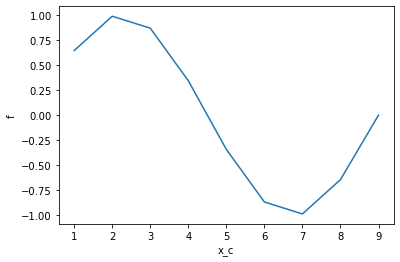

In [21]:
ds.f.plot()

In [24]:
f_cs = grid.cumsum(ds.f, 'X', boundary='fill', fill_value=0)
f_cs

<xarray.DataArray (x_g: 10)>
array([ 0.00000000e+00,  6.42787610e-01,  1.62759536e+00,  2.49362077e+00,
        2.83564091e+00,  2.49362077e+00,  1.62759536e+00,  6.42787610e-01,
        1.11022302e-16, -1.33907057e-16])
Coordinates:
  * x_g      (x_g) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5

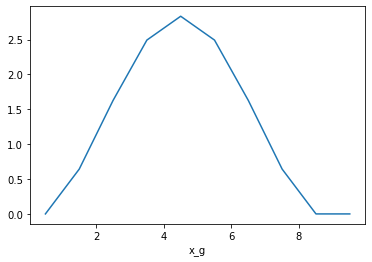

In [25]:
f_cs.plot()

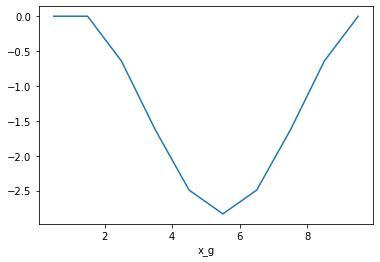

In [26]:
f_cs = grid.cumsum(ds.f.sortby(ds['x_c'], ascending=False), 
                   'X', boundary='fill', fill_value=0.)
f_cs.plot()